# Notebook Klasifikasi Diabetes
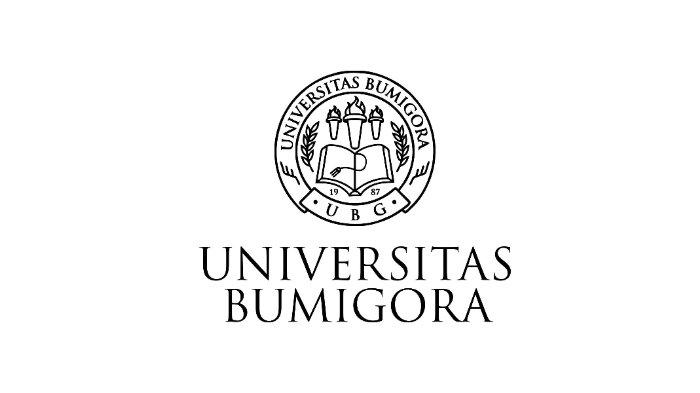

**Dibuat oleh: I Nyoman Switrayana, S.T., M.T**

**Tanggal: 17 September 2024**

Notebook ini dibuat untuk Praktikum Matakuliah Pemrograman 5 Program Studi S1 Ilmu Komputer.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/Praktikum Pemrograman 5

/content/drive/My Drive/Colab Notebooks/Praktikum Pemrograman 5


In [3]:
ls

'10 Association Rule Apriori and FP-Growth.ipynb'                'Data SLR.csv'
'11 Text Mining.ipynb'                                            decision_tree.jpg
'12-13 FLASK Diabetes Classification using Random Forest.ipynb'   diabetes.csv
'1 Python and Data Mining Introduction .ipynb'                   'Groceries Association Rule.csv'
'2 Preprocessing Data.ipynb'                                     'House Price MLR.csv'
'3 EDA Diabetes Data.ipynb'                                       Mall_Customers.xlsx
'4a Simple Linear Regression.ipynb'                               output.csv
'4b Multivariate Linear Regression.ipynb'                         output.xlsx
'5 Diabetes Classification using KNN & Naive Bayes .ipynb'        sales.db
'6 Diabetes Classification using Decision Tree & SVM.ipynb'       sales.sql
'7 Diabetes Classification using Random Forest.ipynb'             spam.csv
'9 Clustering using K-Means and K-Medoids.ipynb'                 'Tugas Praktikum.gslides'
'Clustering da

In [4]:
path = "/content/drive/My Drive/Colab Notebooks/Praktikum Pemrograman 5"

In [5]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv(path + '/diabetes.csv',sep=",")

df =pd.DataFrame(data)
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = df['Outcome'] # 1(Presence / ada) dan 0(Absence / tidak ada)

In [7]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [10]:
df.shape

(768, 9)

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
#Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.describe()
# round(df.describe(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
#Mengecek adanya missing value (data yang kosong)
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
#Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [16]:
#Mengecek baris dan kolom
df.shape

(768, 9)

# EDA

<Axes: >

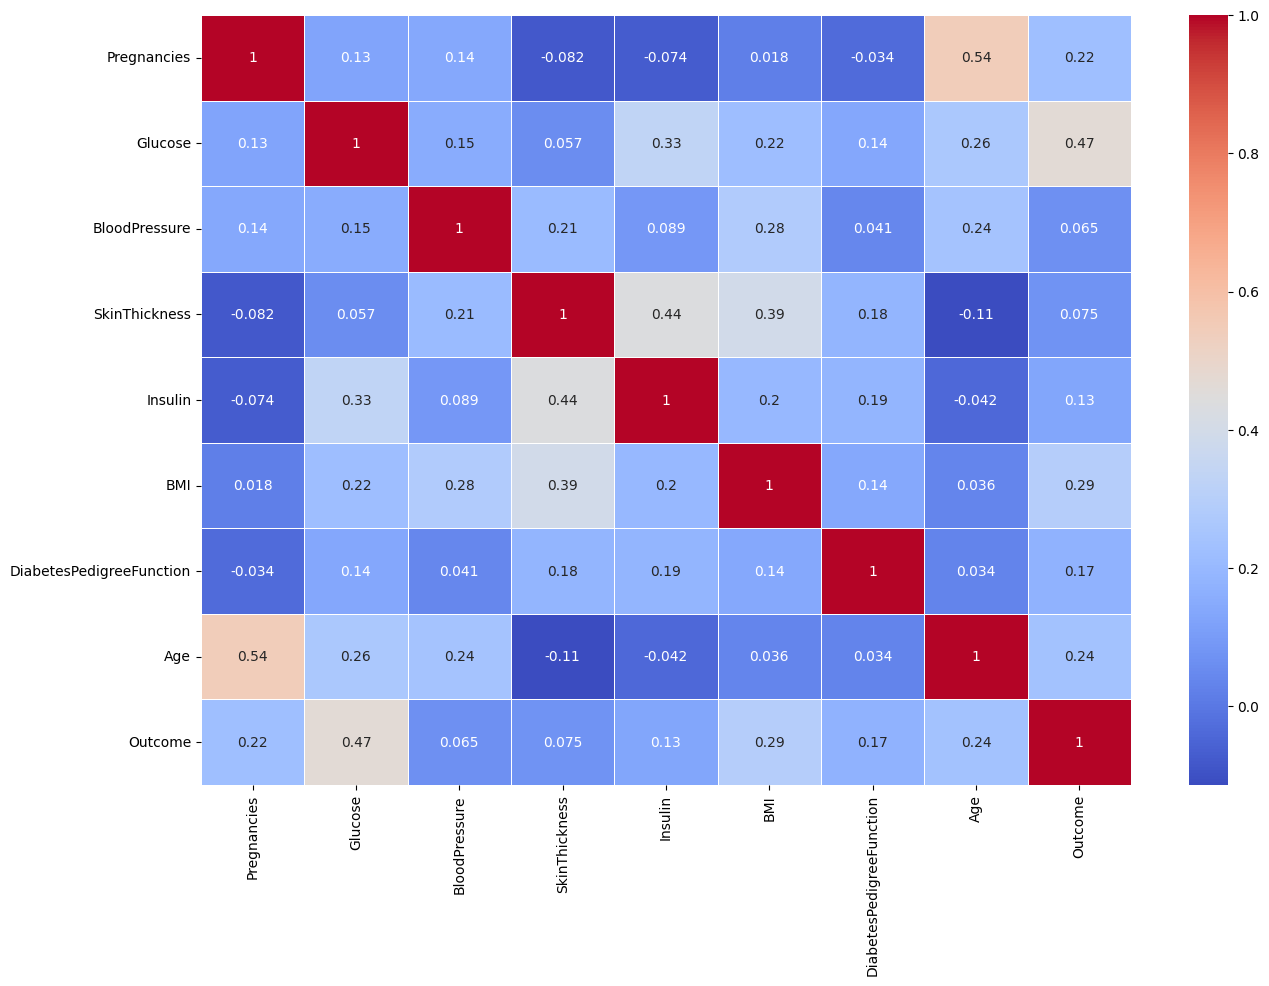

In [17]:
# 1. Mengetahui atribut yang memiliki korelasi tinggi dengan label
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)

<Axes: xlabel='Glucose', ylabel='Count'>

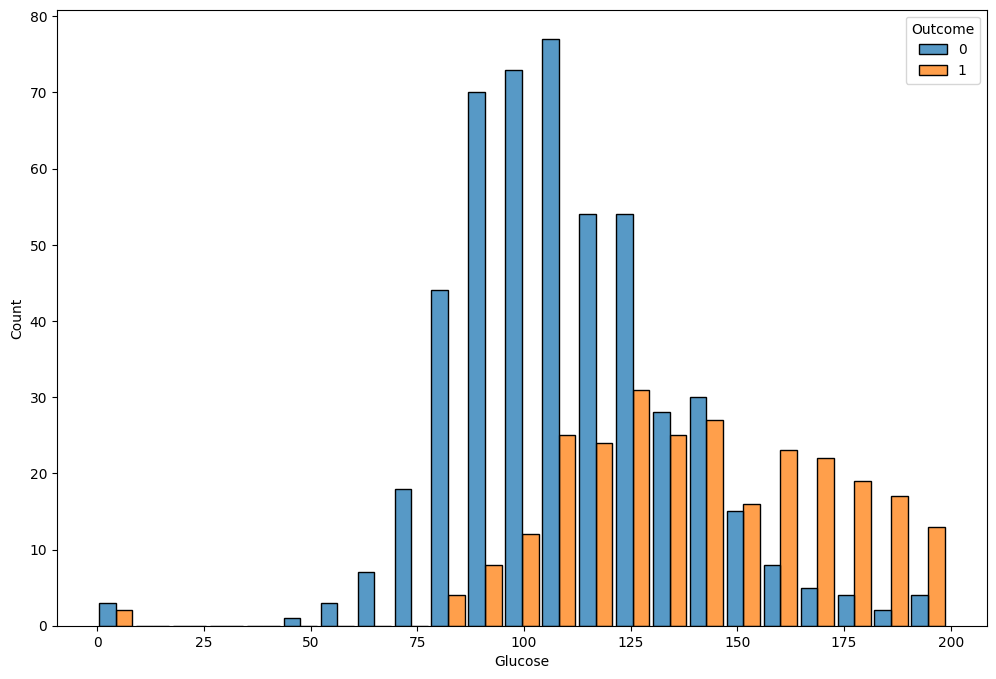

In [18]:
#2. Penyakit Diabetes berdasarkan Glukosa
plt.subplots(figsize=(12,8))
sns.histplot(data=df, x = 'Glucose', hue="Outcome", multiple="dodge",shrink=.9)

<Axes: xlabel='Age', ylabel='Count'>

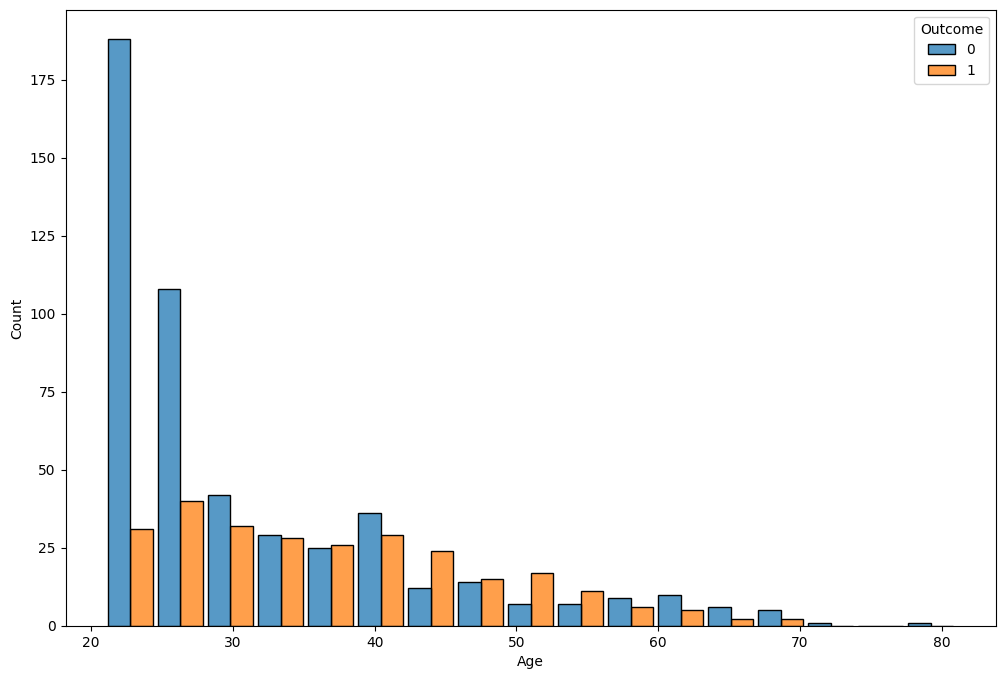

In [19]:
#3. Penyakit Diabetes berdasarkan umur
plt.subplots(figsize=(12,8))
sns.histplot(data=df, x = 'Age', hue="Outcome", multiple="dodge",shrink=.9)

<Axes: xlabel='Insulin', ylabel='Count'>

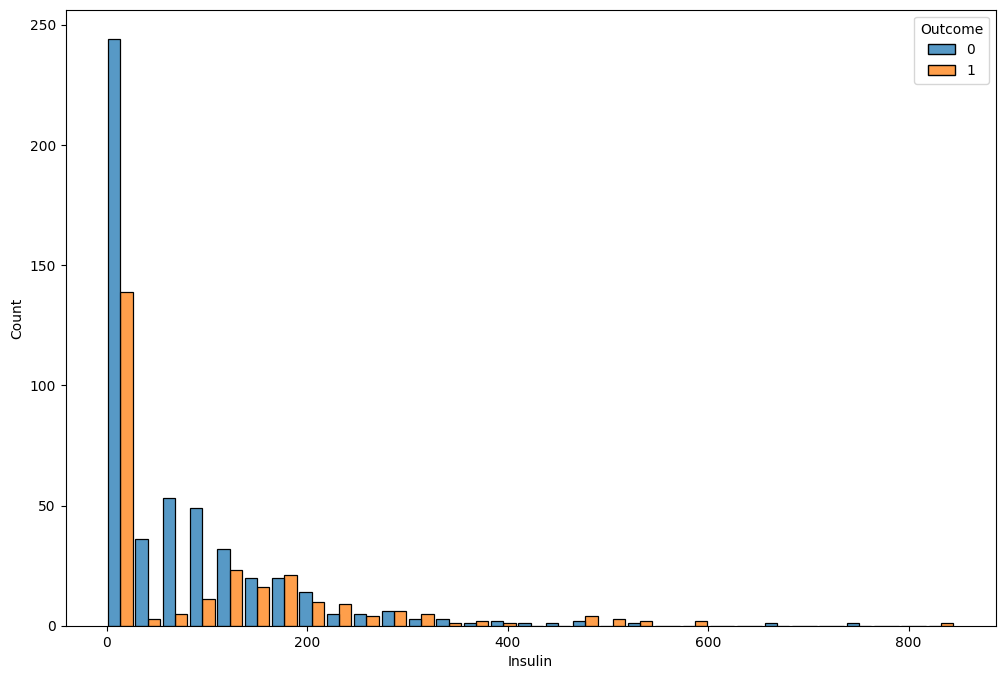

In [20]:
#4. Penyakit diabetes berdasarkan insulin
plt.subplots(figsize=(12,8))
sns.histplot(data=df, x = 'Insulin', hue="Outcome", multiple="dodge",shrink=.9)

<Axes: xlabel='BMI', ylabel='Count'>

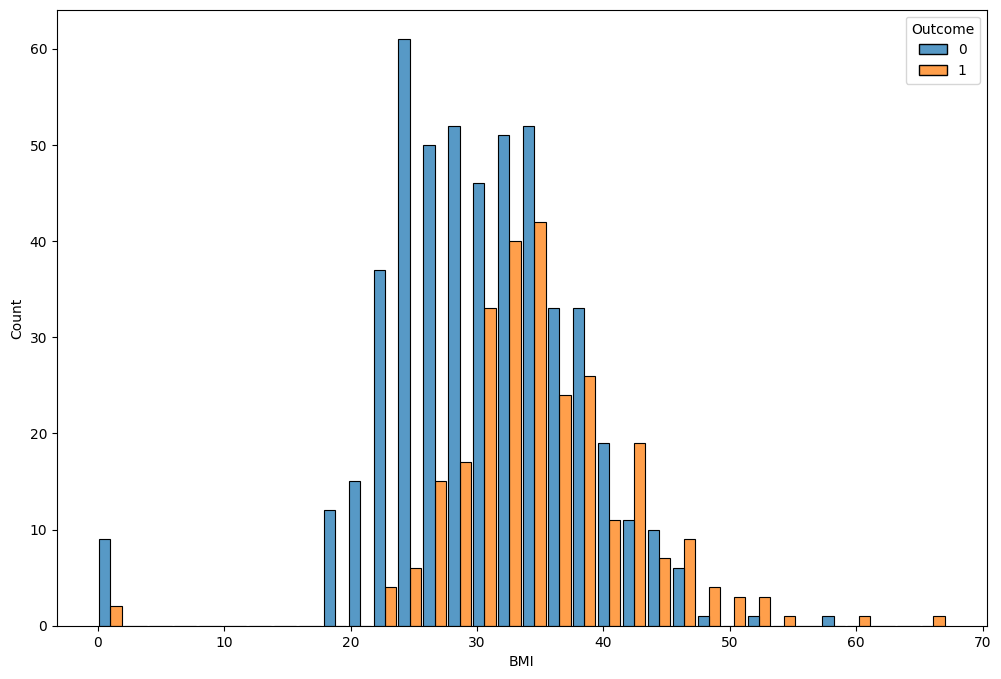

In [21]:
#5. Penyakit diabetes berdasarkan BMI
plt.subplots(figsize=(12,8))
sns.histplot(data=df, x = 'BMI', hue="Outcome", multiple="dodge",shrink=.9)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

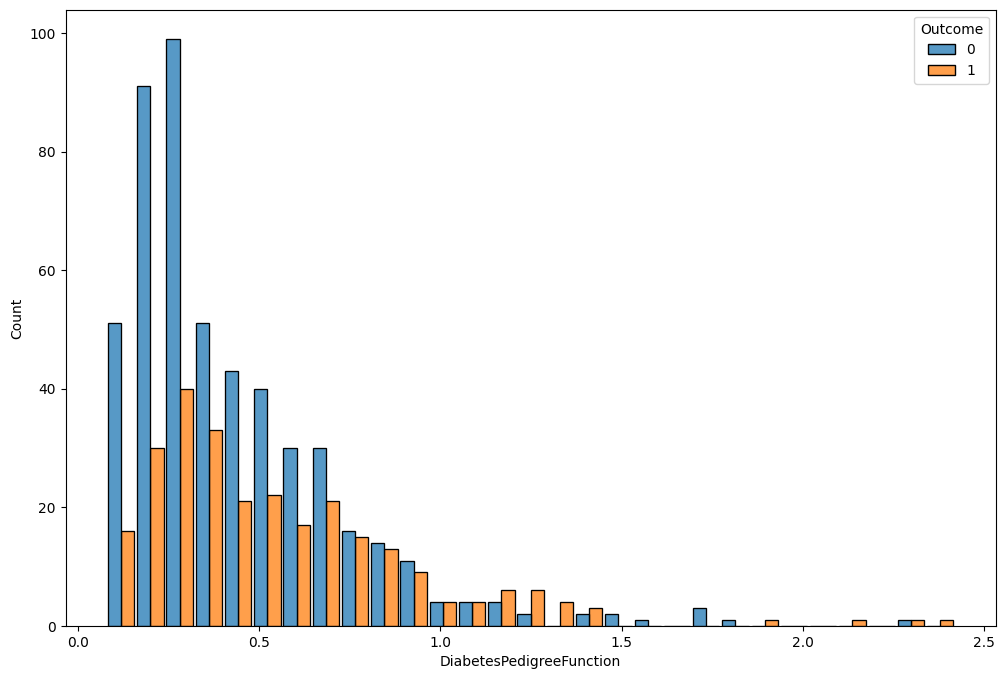

In [22]:
#6. Penyakit diabetes berdasarkan DiabetesPedigreeFunction
plt.subplots(figsize=(12,8))
sns.histplot(data=df, x = 'DiabetesPedigreeFunction', hue="Outcome", multiple="dodge",shrink=.9)

<Axes: xlabel='Pregnancies', ylabel='Count'>

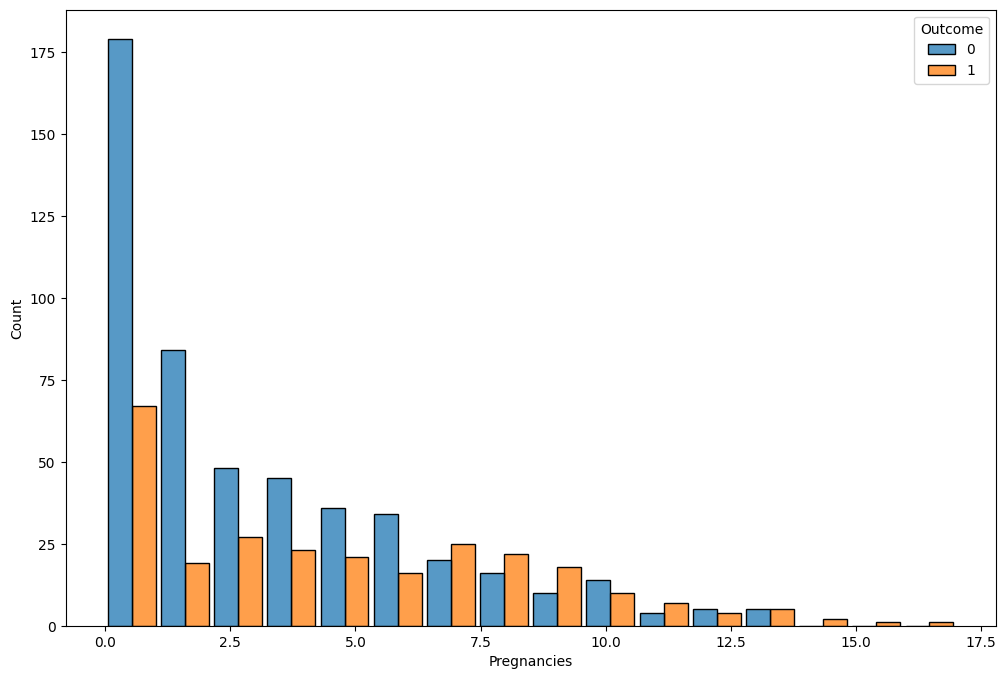

In [23]:
#7. Penyakit diabetes berdasarkan Pregnancies
plt.subplots(figsize=(12,8))
sns.histplot(data=df, x = 'Pregnancies', hue="Outcome", multiple="dodge",shrink=.9)

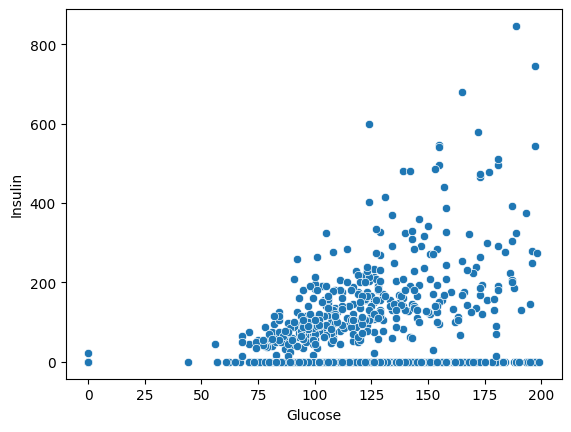

In [24]:
#8. Korelasi antara atribut glukosa dengan insulin
sns.scatterplot(x='Glucose',y='Insulin',data=df)
plt.show()

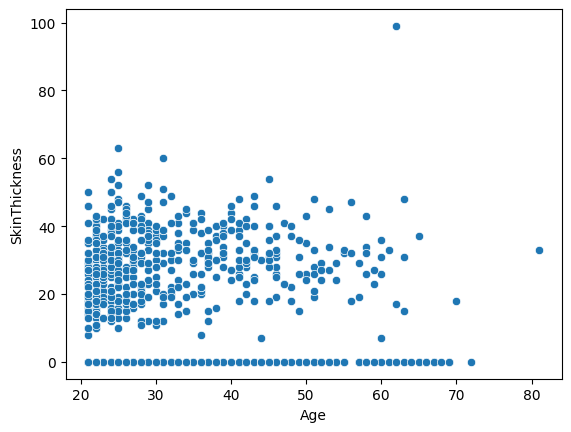

In [25]:
#9. Korelasi antara atribut glukosa dengan insulin
sns.scatterplot(x='Age',y='SkinThickness',data=df)
plt.show()

Jumlah Kelas 0 (Tidak Diabetes):  500
Jumlah Kelas 1 (Diabetes) :  268


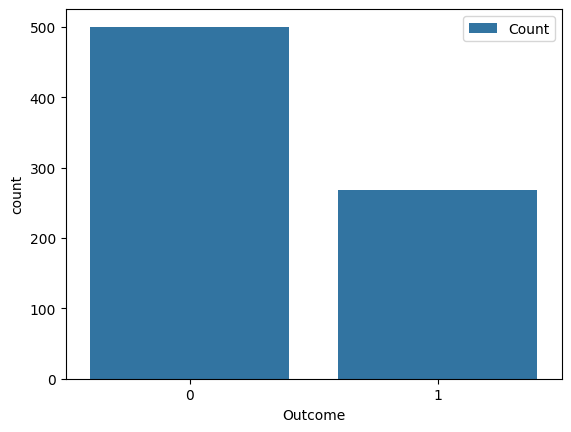

In [26]:
#10. Jumlah masing-masing label/kelas penderita diabetes
sns.countplot(data=df, x = 'Outcome', label='Count')
A, P = df['Outcome'].value_counts()
print('Jumlah Kelas 0 (Tidak Diabetes): ',A)
print('Jumlah Kelas 1 (Diabetes) : ',P)

# Split the Dataset

In [27]:
#Membagi data training dan testing dengan split data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [28]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [29]:
Y_train.shape

(614,)

In [30]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


In [31]:
Y_test.shape

(154,)

# Build and Train the Model

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Build and Train the Model
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [33]:
print("Jumlah pohon dalam Random Forest:", len(rf_classifier.estimators_))

Jumlah pohon dalam Random Forest: 1000


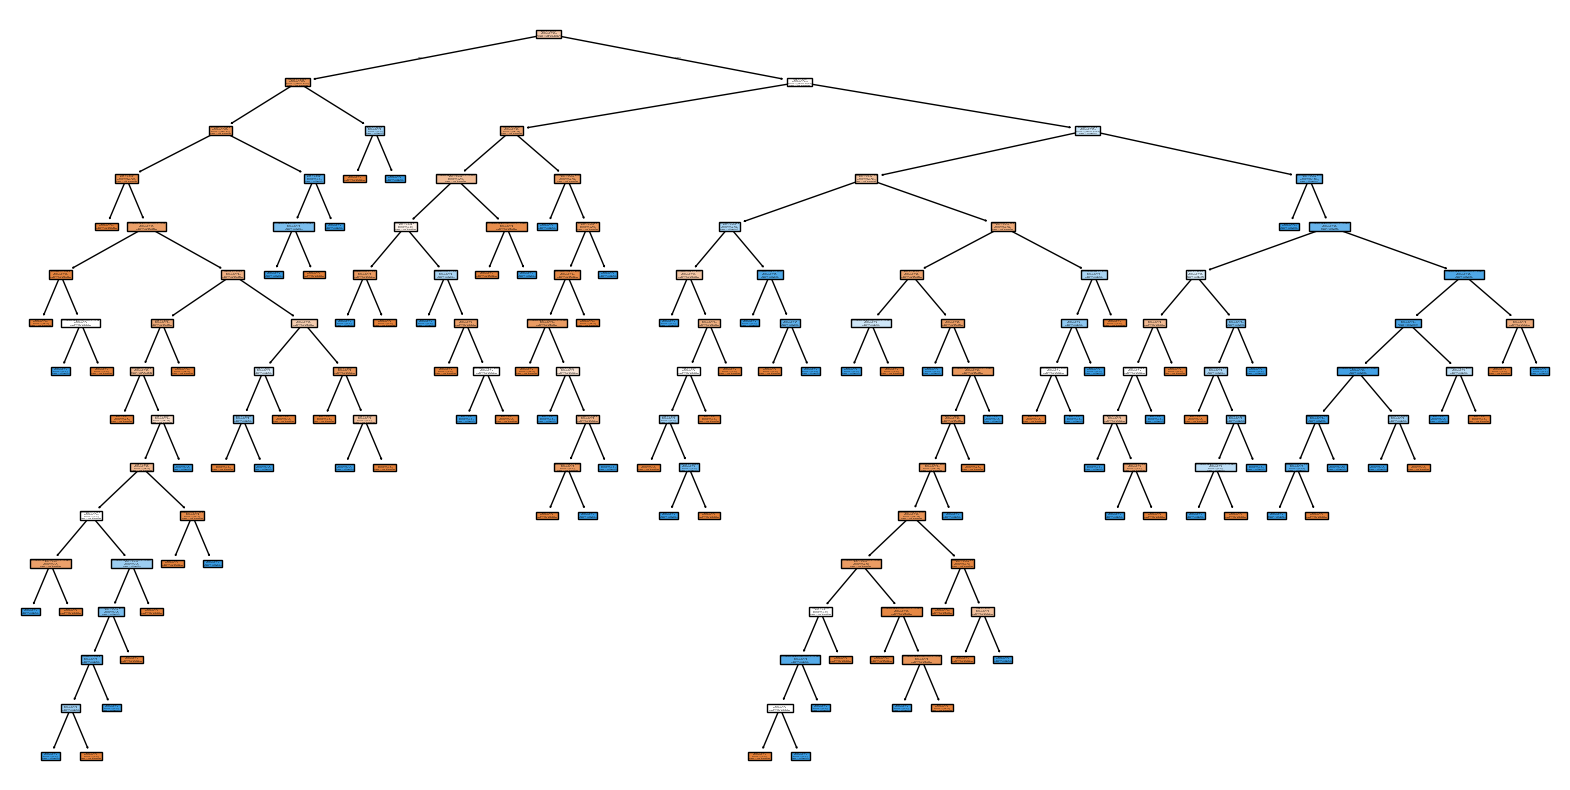

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot a single decision tree from the Random Forest
plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

# Evaluation

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_rf = rf_classifier.predict(X_test)
print("Performa Random Forest")
print("Akurasi Random Forest :", accuracy_score(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

Performa Random Forest
Akurasi Random Forest : 0.8181818181818182
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



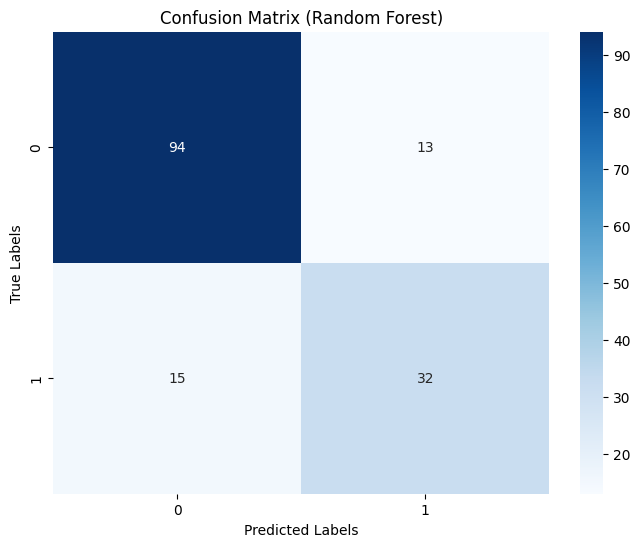

              precision    recall  f1-score   support

           0     0.8624    0.8785    0.8704       107
           1     0.7111    0.6809    0.6957        47

    accuracy                         0.8182       154
   macro avg     0.7867    0.7797    0.7830       154
weighted avg     0.8162    0.8182    0.8170       154



In [36]:
cm_rf = confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate classification report with zero_division parameter
report_rf = classification_report(Y_test, y_pred_rf, zero_division=0, digits=4)  # Zero division: You can use 0, 1, 'warn', or 'raise'
print(report_rf)

In [37]:
# Simpan hasil klasifikasi metode Random Forest
print("Hasil Klasifikasi Metode Random Forest")
df_rf = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_rf.flatten()})
print(df_rf)

Hasil Klasifikasi Metode Random Forest
     Actual  Predicted
661       1          1
122       0          0
113       0          0
14        1          1
529       0          0
..      ...        ...
476       1          0
482       0          0
230       1          0
527       0          0
380       0          0

[154 rows x 2 columns]


In [38]:
#4,90,88,47,54,37.7,0.362,29,0
#0,125,68,0,0,24.7,0.206,21,0
#0,132,78,0,0,32.4,0.393,21,0

#TESTING USING UNSEEN DATA

In [39]:
#Test Data Baru
input_data = (0,132,78,0,0,32.4,0.393,21)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediksi = rf_classifier.predict(input_data_reshape)
print(prediksi)

if (prediksi[0] == 0):
    print('Tidak Diabetes')
else:
    print('Diabetes')

[0]
Tidak Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [40]:
# prompt: Buatkan saya aplikasi sederhananya menggunakan flask

from flask import Flask, render_template, request
import numpy as np

app = Flask(__name__)

# Load your trained model (replace with your actual model loading)
# rf_classifier = ...  # Load your Random Forest model

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        try:
            pregnancies = int(request.form['pregnancies'])
            glucose = int(request.form['glucose'])
            bloodpressure = int(request.form['bloodpressure'])
            skinthickness = int(request.form['skinthickness'])
            insulin = int(request.form['insulin'])
            bmi = float(request.form['bmi'])
            diabetespedigreefunction = float(request.form['diabetespedigreefunction'])
            age = int(request.form['age'])

            input_data = (pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, diabetespedigreefunction, age)
            input_data_as_numpy_array = np.array(input_data)
            input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

            prediction = rf_classifier.predict(input_data_reshape)[0]  # Make prediction

            if prediction == 0:
                result = 'Tidak Diabetes'
            else:
                result = 'Diabetes'

            return render_template('result.html', prediction=result)

        except ValueError:
            return render_template('error.html', message='Invalid input. Please enter valid numbers.')

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


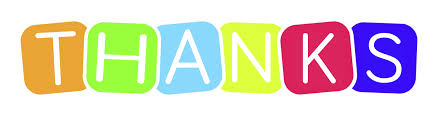